<center><img src='http://i.stack.imgur.com/UJl1A.jpg' width='600px'></center>

**Kernel Reference**: [Scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html)

## Import necessary packages
We will need these along the way, I have tried to explain the purpose of each libraries as comments.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# The below two are visualization libraires
import matplotlib.pyplot as plt
import seaborn as sns 

# for calculating interval
from time import time

plt.rcParams['figure.figsize'] = 10,8 # setting default figure size for the kernel

# for clustering image pixels
from sklearn.cluster import KMeans 
# for simple image processing tasks
from skimage import io

## Load a sample photo

If you want to try out your own image feel free to replace the URL with your favorite image. Here, we will be working with this sweet lil guy.

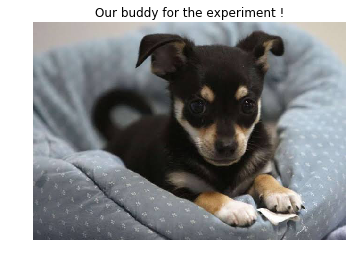

In [2]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTzLzdD4MoAPP3I_JjrxndAqKg1zXtEnaODwsHbH6il9BL3Qt61'
img_original = io.imread(url)
plt.axis('off')
plt.imshow(img_original)
plt.title('Our buddy for the experiment !')
plt.show()

## Make sure the model understands you

As most of you know, computers unlike humans interpret images as numbers (to be more specific, numerical array). So we must take care (preprocess) the image prior to any analytical operation.

Below, we will be performing the following operations:
- Normalization, color range is from 0 to 255 and dividing by max value will scale it down to 0 - 1 range.
- Reshaping, the clustering algorithm is expecting a max of 2 dimension array so we will have to make necessary adjustments for it to work properly. 

In [3]:
# Unit normalizing 
img = np.array(img_original,dtype=float) / 255

# Save the dimensions, we will be need them later
w, h, d = original_shape = img.shape
print('Original Shape'.center(20,'='))
print(img.shape)

# image_array size - w*h , d
image_array = img.reshape(-1,d)
print('ReShaped'.center(20,'='))
print(image_array.shape)

===Original Shape===
(462, 664, 3)
======ReShaped======
(306768, 3)


## The real work begins

Now, the clustering algorithm will find common cluster based on which we can reduce the colors in the image. Even before beginning we will have to specify the number of clusters (common color points) one would like to have in the final image. I have randomly chosen `64` and `32` as the number of clusters. Try out values like `128` and `16` to see more drastic change.

**Note:** As the number of clusters increases, the image will be closer to the original image but at the cost of higher computational cost.

In [4]:
n_colours = [64,32]

# 64 colour image
t0 = time()
kmeans64 = KMeans(n_clusters = n_colours[0],random_state=42,verbose=2,n_jobs=-1).fit(image_array)

print(f'Completed 64 clusters in {round(time()-t0,2)} seconds.')

# 32 colour image
t0 = time()
kmeans32 = KMeans(n_clusters = n_colours[1],random_state=42,verbose=2,n_jobs=-1)
kmeans32.fit(image_array)

print(f'Completed 32 clusters in {round(time()-t0,2)} seconds.')

labels64 = kmeans64.labels_
labels32 = kmeans32.labels_

Completed 64 clusters in 60.92 seconds.
Completed 32 clusters in 29.31 seconds.


Within cluster sum of square error, it measures the variance of datapoints inside a cluster.

Use this to know how well the clustering worked. The lower, the better.

In [5]:
print(f'Within cluster sum of square error for {n_colours[0]} clusters = {round(kmeans64.inertia_,2)}')
print(f'Within cluster sum of square error for {n_colours[1]} clusters = {round(kmeans32.inertia_,2)}')

Within cluster sum of square error for 64 clusters = 138.6
Within cluster sum of square error for 32 clusters = 274.4


## Sample check
What labels has the 64 cluster model produced?

In [6]:
# checking the compressed values
compressed = pd.DataFrame(image_array,columns=['Red','Green','Blue'])
compressed['labels'] = kmeans64.labels_
compressed

,Red,Green,Blue,labels
0,0.678431,0.639216,0.635294,14
1,0.678431,0.639216,0.635294,14
2,0.682353,0.643137,0.639216,14
3,0.682353,0.643137,0.639216,14
4,0.686275,0.647059,0.643137,14
...,...,...,...,...
306763,0.333333,0.337255,0.419608,7
306764,0.329412,0.333333,0.415686,7
306765,0.333333,0.337255,0.419608,7
306766,0.345098,0.349020,0.431373,7


## Helper function

This function will utilize the cluster center details to reconstruct a simplified version of the image.

Function logic:
- Create a new image having similar shape of the original image
- For each pixel value check the cluster label assigned
- Based on the label, find the common color/centroid value (eg: the value found in ```kmeans64.cluster_centroids_```)
- In the new image, fill the corresponding pixel position with the new color value.

In [7]:
# Recreate image
def recreate_image(centroids, labels, w, h):
    # centroids variable are calculated from the flattened image
    # centroids: w*h, d 
    # so each row depicts the values per depth
    d = centroids.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            # filling values in new image with centroid values
            image[i][j] = centroids[labels[label_idx]]
            label_idx += 1
    return image

## Time for the results

🥁 *drum roll please* 🥁

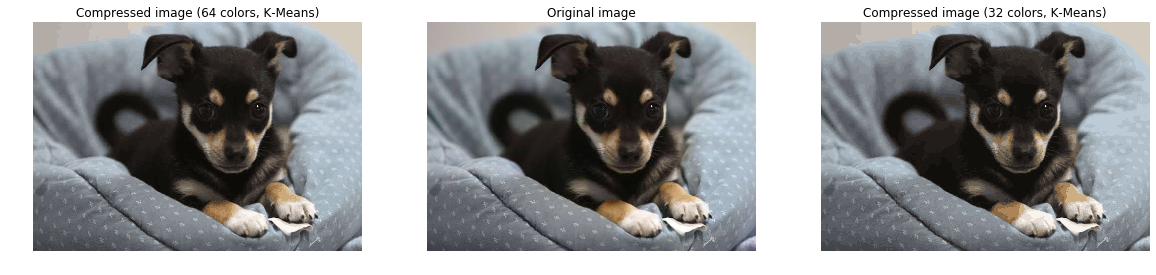

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(132)
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

plt.subplot(131)
plt.axis('off')
plt.title('Compressed image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans64.cluster_centers_, labels64, w, h))

plt.subplot(133)
plt.axis('off')
plt.title('Compressed image (32 colors, K-Means)')
plt.imshow(recreate_image(kmeans32.cluster_centers_, labels32, w, h))

plt.show()

You might not notice much difference at first but try to zoom the kernel and take a look at it again.

## To do
- [X] Use custom images
- [X] Add jobs for faster execution.
- [ ] Compare performance with other clustering methods (hierarchical and density based)
- [ ] % change of size per image

*If you have been this far and enjoyed the kernel, let's give an upvote for this kernel.*